# Probabilistic Modeling for Latent-Variable and Implicit Generative Models

view-horse-with-mechanical-robotic-parts-futuristic-style_23-2151626093.jpg

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/practicals/Generative_AI/Part_2/Probabilistic_Modeling_for_Latent_Variable_and_Implicit_Generative_Models_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:**

- Jemma Daniel
- Rachel Catzel
- Exaucé Luweh Adjim Ngarti
- Yessine Khanfir
- Mirgahney Mohamed
- Kevin Eloff

**Introduction:**

Welcome to the second session of the Generative AI practical track. In this session, we will explore probabilistic modelling, focusing on latent variable models and implicit models. We introduce key concepts and theoretical foundations before moving to hands-on practice with Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs). These implementations aim to build intuition for how the models function and provide experience with the underlying code.

**Topics:**

Content: Probabillistic modelling (GANs, VAEs)
Level: Intermediate


**Aims/Learning Objectives:**

- Understand probabilistic generative models (explicit likelihood, latent variables).
- Learn the VAE-GAN spectrum and their assumptions.
- Implement and train a simple GAN and/or VAE.


**Prerequisites:**

- Joint, marginal, and conditional probability
Gaussian distributions
- KL divergence
- Basic gradient/backprop
- Basic linear algebra (vectors, dot products, matrix multiplication)

**Outline:**


>[Probabilistic Modelling](#scrollTo=m2s4kN_QPQVe)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>>[Section 1: Introduction to Probabilistic Models](#scrollTo=erZ58SocYI0t)

>>>>>[Answer to group task 1](#scrollTo=Z2DsWFYZlT-r)

>>>>>[Answer to group task 2](#scrollTo=2IvidfH-lT-r)

>>>[🎨 Visualisations](#scrollTo=V100H6-plT-r)

>>>>[Bernoulli distribution](#scrollTo=HQeeQXb4TfA0)

>>>>[Normal distrbution](#scrollTo=57GwQU5STmLR)

>>>>[👩‍💻 Code Task](#scrollTo=XQUg9VYzjYn3)

>>>>>[Reveal the answer below](#scrollTo=qwQdNWAClT-s)

>>>[✅ Takeaways](#scrollTo=Ho2iO7JnlT-s)

>>[Section 2: Families of Generative Models](#scrollTo=dY0w3HEFlT-s)

>>>[💡 Important Concepts](#scrollTo=h_YwVw6QlT-t)

>>>>[💡 Latent and Observed Variables](#scrollTo=uLTPjQMs_zar)

>>>>>[🔎 Example](#scrollTo=uLTPjQMs_zar)

>>>>>[Observed vs. Latent](#scrollTo=8Cfrpo-8fiOM)

>>>>[💡 Latent Variable Models](#scrollTo=8BkpPJAv9mJZ)

>>>>>[Generation $p_\theta(x)$](#scrollTo=DitQ9YknhiCN)

>>>>>[Representation $p_\theta(z \mid x)$](#scrollTo=DitQ9YknhiCN)

>>>>>[💡 Bayes’ Rule in Action](#scrollTo=luOuUAHn_pi7)

>>>>>[👩‍💻 Code Task](#scrollTo=UScvR_PLj5GS)

>>>>>[Answer to code task](#scrollTo=D6o0M71VlT-t)

>>>>>[🔎 Seeing Bayes’ Rule in Action](#scrollTo=20MT_Vp9wsQl)

>>>>[Instructions](#scrollTo=20MT_Vp9wsQl)

>>>>>[💡 Summary](#scrollTo=dEej_dNKtpFZ)

>>>>>[💡 Evidence Lower Bound (ELBO)](#scrollTo=CAnCHYyfqy5W)

>>>>[Consequences of maximizing the ELBO (clear links)](#scrollTo=CAnCHYyfqy5W)

>>>>>>[summary](#scrollTo=CAnCHYyfqy5W)

>>>[🤖 Latent-Variable Models](#scrollTo=1gXcW0OzQqRB)

>>>>[Variational Autoencoders (VAEs)](#scrollTo=ek_59YgEQ3jv)

>>>>>[👩‍💻 Code Example](#scrollTo=kxZ25gKmlT-y)

>>>[🤖 Implicit Models](#scrollTo=vgOYrATTSru8)

>>>>[Generative Adversarial Networks (GANs)](#scrollTo=RqaLkQiBS3t3)

>>>>>[🕵️ Intuition](#scrollTo=7K0hf36TS78R)

>>>>>[🧮 Mathematical Principle](#scrollTo=TRzXr4itTIJ5)

>>>>>[👩‍💻 Code Example](#scrollTo=piQiHpiKlT-y)

>>[Feedback](#scrollTo=o1ndpYE50BpG)



**Before you start:**

For this practical, it is advised you use a GPU if you are on Google Colab. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.

Another important step you need to do. You cannot continue without this!
- Go to `Tools > Settings > Miscellaneous`
- Make sure the options for `Kitty mode` and `Corgi mode` are checked!

## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

import subprocess
import os

# Based on https://stackoverflow.com/questions/67504079/how-to-check-if-an-nvidia-gpu-is-available-on-my-system
try:
    subprocess.check_output('nvidia-smi')
    print("a GPU is connected.")
except Exception:
    # TPU or CPU
    if "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
      print("A TPU is connected.")
      import jax.tools.colab_tpu
      jax.tools.colab_tpu.setup_tpu()
    else:
      print("Only CPU accelerator is connected.")
      # x8 cpu devices - number of (emulated) host devices
      os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

import matplotlib.pyplot as plt
import numpy as np

# Other requirements
from matplotlib.lines import Line2D

from ipywidgets import interact

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

a GPU is connected.


## Section 1: Introduction to Probabilistic Models

In the first practical we saw an overview of generative AI. These generative models are a type of probabilistic models. To understand **generative models** better, it's helpful to contrast them with **discriminative models**.

- 🤖 **Discriminative Models:**
  >Discriminative models learn the boundary between different classes of data. Given a data point $x$, they predict a label $y$. They are concerned with the *conditional probability* $p(y|x)$, which can be interpreted to mean the probability of the output $y$ given the input $x$.

  🔎 For example, a model that looks at a picture of an animal and tells you if it's a 'cat' or a 'dog' is a discriminative model. Here the input $x$ may be an image of a cat and the output $y$ would be ‘cat’, if the model predicts correctly.

- 🤖 **Generative Models:**
  > Generative models learn the joint probability distribution $p(x, y)$ of the data $x$ and labels $y$, or just $p(x)$ if there are no labels. A model that learns the joint distribution not only learns the relationship between input $x$ and output $y$, but also the relationship between output $y$ and input $x$.

  🔎 For example, we can train a generative model on images of cats. The model learns the combinations of colours, shapes, and textures that make an image look like a cat. Because they model how the data is generated, they can create new data points. In our example, the model can learn to generate novel, realistic pictures of cats. Because the model has learnt what features make up a cat, it would also be able to predict the label “cat” if given an image of a cat.

🕵️ Let us make this more general and consider the task of modelling data from two different classes.

**Discriminative:** In this case, we are interested in learning a probability distribution $p(y|x)$, i.e., the  probability of the class $y$ being either 0 or 1 given an example $x$. For any example $x$, we can determine whether it is more likely to be from class 0 or class 1, and draw a corresponding decision boundary where $p(y = 0|x) = p(y = 1|x)$.

**Generative:** Here, we are interested in learning the probability distribution $p(x|y)$, i.e., the probability of observing some data $x$ given that it is from class $y$. We might also be interested in learning the probability distribution $p(x)$ which is the probability of observing $x$ in either of the classes. *The cool thing about generative modelling is that if we can sample $x \sim p(x|y)$ or $x \sim p(x)$ we can generate new unseen examples*.


🔎 Below we can see a visual comparison between discriminative and generative models.

<img src="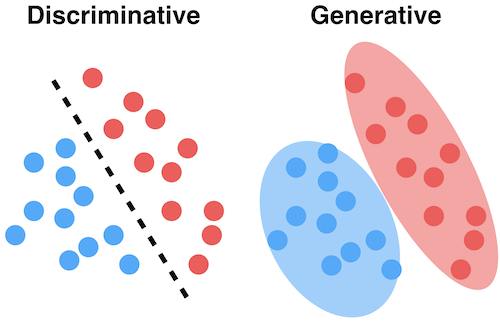
" width="60%" />

In the picture above ([source](https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/)), red and blue dots represent examples ($x$) from classes $y = 0$ and $y = 1$, respectively. The dashed black line shows the decision boundary in the discriminative case. In the generative case, the light red and blue ovals show the areas where $p(y = 0|x)$ and $p(y = 1|x)$ are large, respectively.

A **probability distribution** is a mathematical function that describes the likelihood of different possible outcomes for a given event.

For **discrete variables** (outcomes you can explicitly count), a distribution tells you the probability of each specific outcome. A classic example is a coin flip, where the possible outcomes are heads or tails, each with a probability of 1/2 ⚖️. The probabilities of each outcome sum to 1.

Another example is rolling a fair six-sided die 🎲

📌 **Group task 1:** Discuss with your neighbors what are the possible outcomes when rolling a six-sided die?

A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example, in the coin flipping example, we could use a binary random variable with $X = 1$ if the coin is heads and $X = 0$ for tails.

📌 **Group task 2:** Discuss with your neighbors and write down a random variable to describe rolling the fair six-sided die?

##### Answer to group task 1

The outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

##### Answer to group task 2

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$. Here there are many possible answers, this is one:

$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$

### 🎨 Visualisations

👇 **Below is a code example using JAX to visualize a simple distribution. You can adjust parameters to see how the distribution changes.**

#### Bernoulli distribution

Let us model another example of a discrete probaility distribution with two outcomes.

In [ ]:
# Plot a Bernoulli distribution with probability p of success
def plot_bernoulli(p=0.5):
    outcomes = jnp.array([0, 1])
    probs = jnp.array([1-p, p])
    plt.bar(outcomes, probs, width=0.4)
    plt.xticks([0, 1], labels=["0 (Failure)", "1 (Success)"])
    plt.ylim(0, 1)
    plt.title(f"Bernoulli Distribution (p={p:.2f})")
    plt.ylabel("Probability")
    plt.show()

interact(plot_bernoulli, p=(0.0, 1.0, 0.1));

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

#### Normal distrbution

For **continuous variables** (outcomes that can take any value in a range), the probability distribution is described by a curve, also known as probability density function (PDF). For instance, imagine you are a farmer selling watermelons. Their masses don't fall into neat categories; they can be 4.5kg, 5kg, or 5.5kg. A continuous distribution curve would tell you the probability of a watermelon's mass falling within a certain range (e.g., between 4kg and 6kg). If we integrate over all values of the PDF, it sums to 1.

A **Normal (Gaussian) Distribution:** may describe this data. It's defined by its **mean** (the center of the peak) and **standard deviation** (how spread out the curve is). It's incredibly common in nature and is often a good first guess for continuous data.

In [ ]:
# Plot a Normal distribution with fixed axes
def plot_normal(mu=0.0, sigma=1.0):
    x = jnp.linspace(-10, 10, 500)  # Fixed x-axis range
    coeff = 1.0 / (sigma * jnp.sqrt(2 * jnp.pi))
    pdf = coeff * jnp.exp(-0.5 * ((x - mu) / sigma)**2)

    plt.plot(x, pdf)
    plt.title(f"Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.xlim(-10, 10)              # Fixed x-axis
    plt.ylim(0, 0.5)               # Fixed y-axis
    plt.grid(True)
    plt.show()

interact(plot_normal, mu=(-5.0, 5.0, 0.5), sigma=(0.1, 5.0, 0.1));


interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

#### 👩‍💻 Code Task

**Challenge : Complete the code below to compute the mean of a discrete distribution defined by a list of outcomes and their probabilities. Use jax.numpy for computation.**

In [ ]:
outcomes = jnp.array([0, 1, 2, 3])
probs = jnp.array([0.1, 0.3, 0.4, 0.2])
# TODO: compute the expected value (mean) of the distribution
expected_value = None  # replace None with the computation
print("Expected value:", expected_value)


Expected value: None


##### Reveal the answer below

In [ ]:
outcomes = jnp.array([0, 1, 2, 3])
probs = jnp.array([0.1, 0.3, 0.4, 0.2])
# TODO: compute the expected value (mean) of the distribution
expected_value = jnp.sum(outcomes * probs)  # replace None with the computation
print("Expected value:", expected_value)

Expected value: 1.7


### ✅ Takeaways

The process of finding the "best" parameters for a model based on the data is the essence of **learning** or **fitting** in machine learning. By fitting a probability model to our data, we create a representation that we can analyse, make predictions from, and **generate** from.

The main goal of a generative model is to learn the underlying probability distribution of a dataset. The goal is to understand the data so well that the model can create new, synthetic data points that are similar to the original data.

## Section 2: Families of Generative Models

Generative models are unsupervised learning models that learn a data distribution and can generate new samples from it. There are several families of deep generative models, each with different assumptions and training objectives.

👉 In this practical, we will explore major generative model families, highlighting their intuition, mathematical foundations, and simple JAX-based examples for each:

* 🟢 **Latent-Variable Model**s: Models with latent variables that optimize a proxy for likelihood. We cover Variational Autoencoders (VAEs).
* 🟢 **Implicit Models**: Models that do not explicitly define a probability density, but can generate samples. We cover Generative Adversarial Networks (GANs).

In future practicals we will cover
* 🟢 **Explicit Likelihood Models**: Models that directly maximize the likelihood of the data, such as flow-based models and autoregressive models.
* 🟢 **Stochastic Mapping Models**: Models that use a stochastic process (diffusion) to map between simple and complex distributions, such as Diffusion models.
* 🟢 **Continuous Flow Models**: Models based on continuous-time transformations (neural ODEs), such as Continuous Normalizing Flows (CNFs) and the emerging Flow Matching technique.

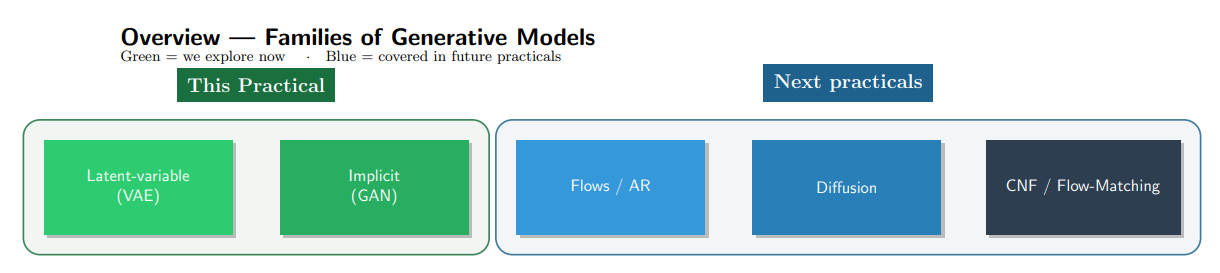

👉 In the sections that follow, our objective is to build your intuition for these models through three complementary perspectives:

1. 🕵️ **Conceptual Overview** : an intuitive, high-level explanation  
2. 🧮 **Mathematical Formulation** : the core equations and theory  
3. 🎨 **Illustrative Code** : concise, example implementations  

Choose the perspective that best suits your learning style. Don’t worry if you don’t master every detail right away, now is the time to explore and develop your intuition.

### 💡 **Important Concepts**

#### 💡 **Latent and Observed Variables**




In many probabilistic models, we distinguish between **observed variables** (the data we have) and **latent variables** (hidden or unobserved factors that influence the data). Latent variables help explain the structure or variability in the observations.

These unobserved variables are not directly measured but are assumed to generate or influence the observed data.

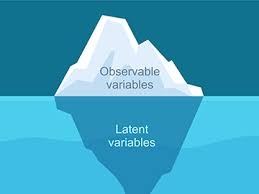



##### 🔎 Example

Suppose our observed data $x$ consists of images of handwritten digits. A latent variable $z$ might represent:

- The digit class (0 through 9)
- Style attributes (stroke width, orientation, etc.)

We do not observe $z$ in the dataset, but it determines the appearance of $x$. In this case, the latent variable captures meaningful structure in the data generation process.



##### Observed vs. Latent

For the following variables, write **Observed** or **Latent**:

1. Image pixels : ________
2. Intelligence: ________
3. Height: ________
4. Sleep quality: ________
5. Vitesse (speed): ________


#### 💡 **Latent Variable Models**

A **latent variable model** defines a joint distribution over observed and latent variables:

$$
p_\theta(x, z) = p(z) \cdot p_\theta(x \mid z)
$$

Where:

- $p(z)$ is the **prior** distribution over the latent variable. It is usually simple (e.g., standard normal).
- $p(x \mid z)$ is the **likelihood**, or generative model, describing how the data is generated from the latent.


From such models we pursue two main goals:

**Task A — Representation (posterior):**  
Obtain a usable description of each datapoint through the posterior
$$
p_\theta(z\mid x)
$$
which supports tasks like compression, clustering, control, or imputation.

**Task B — Generation (marginal):**  
Model the overall data distribution, the evidence
$$
p_\theta(x)
$$
which allows us to sample realistic data.

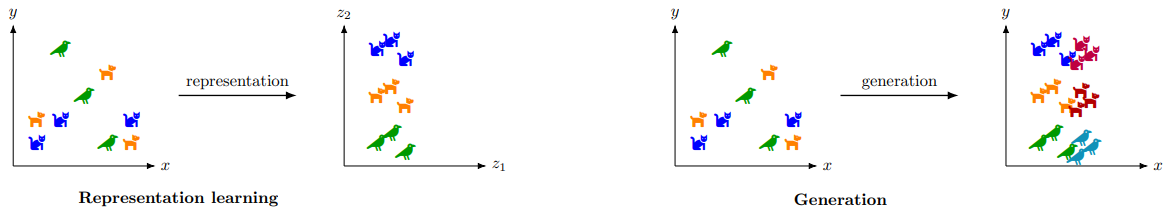

---
##### Generation $p_\theta(x)$

Since we do not observe $z$, the model of the observed data is obtained by **marginalizing** over all possible values of the latent variable:

- **Discrete latent space:**
$$
p_\theta(x) = \sum_z p(z)\,p_\theta(x \mid z)
$$

- **Continuous latent space:**
$$
p_\theta(x) = \int p(z)\,p_\theta(x \mid z)\,dz
$$

This marginal distribution is what we need to generate realistic samples.  
The difficulty: marginalization becomes intractable when $z$ is high-dimensional, since it requires summing or integrating over the entire latent space.  

---

##### Representation $p_\theta(z \mid x)$

To use the model for representation learning, we need the **posterior** distribution of the latent given the observation.  
By Bayes’ Rule:

$$
p_\theta(z \mid x) \;=\; \frac{p_\theta(x \mid z)\,p(z)}{p_\theta(x)}.
$$

This connects observations $x$ to their hidden causes $z$.  
The challenge: the denominator $p_\theta(x)$ is exactly the marginal we just saw, and is equally intractable to compute in most realistic cases.


---
##### 💡 Bayes’ Rule in Action

Bayes’ Rule tells us how to update our belief about a **latent state** $Z$ (e.g. “disease present or not”) after observing evidence $X$ (e.g. “test result”):

$$
P(Z \mid X) = \frac{P(X \mid Z)\,P(Z)}{P(X)},
\qquad
P(X) = \sum_{z} P(X \mid z)\,P(z).
$$



##### 👩‍💻 Code Task


Complete the code below to compute the posterior probability
$P(Z=1 \mid X=1)$ = “probability the patient is sick given a positive test”.

We are given:
- $P(Z)$: prior probability that a patient has the disease  
- $P(X \mid Z)$: probability of a positive test if the patient is sick (sensitivity)  
- $P(X \mid \lnot Z)$: probability of a positive test if the patient is healthy (false positive rate)  


In [ ]:
# Given values
P_Z = 0.01                          # Prior: patient has the disease
P_X_given_Z = 0.99                 # Likelihood: test is positive given disease
P_X_given_notZ = 0.05              # Likelihood: test is positive without disease

# TODO: compute P_notZ
P_notZ = 0

# TODO: compute marginal probability P(X)
P_X = 0

# TODO: compute posterior probability using Bayes' Rule
P_Z_given_X = 0

print(f"P(Z|X) = {P_Z_given_X:.3f}")


P(Z|X) = 0.000


##### Answer to code task

In [ ]:
# Given values
P_Z = 0.01                          # Prior: patient has the disease
P_X_given_Z = 0.99                 # Likelihood: test is positive given disease
P_X_given_notZ = 0.05              # Likelihood: test is positive without disease

# TODO: compute P_notZ
P_notZ = 1 - P_Z

# TODO: compute marginal probability P(X)
P_X = P_X_given_Z * P_Z + P_X_given_notZ * P_notZ

# TODO: compute posterior probability using Bayes' Rule
P_Z_given_X = P_X_given_Z * P_Z / P_X

print(f"P(Z|X) = {P_Z_given_X:.3f}")

P(Z|X) = 0.167


##### 🔎 Seeing Bayes’ Rule in Action

We will use an interactive visualization from Brown University:  
➡️ [Seeing Theory – Bayesian Inference](https://seeing-theory.brown.edu/bayesian-inference/index.html#section1)



#### Instructions

1. **Reality (the true coin):**  
   - Set the parameter to **p = 0.5** (this means the coin is actually fair, no bias).

2. **Your belief (the prior):**  
   - Choose a prior distribution for the coin.  
   - Assume you *believe* the coin is biased towards tails.  
   - Set **α = 1.86** and **β = 5** for the prior.

3. **Observation (the data):**  
   - Click **“Flip the Coin”** to simulate coin tosses.  
   - Each flip produces a Head (H) or Tail (T).  
   - Perform about **5 flips**.

4. **Update (Bayes’ rule):**  
   - Watch how the prior is updated step by step.  
   - After a few flips, the **posterior distribution** should concentrate near the true distribution (**p = 0.5**).

---

##### 💡 Summary

In our toy example (disease and test), Bayes’ Rule was easy to compute because  
the latent state $Z$ was binary.  

But in deep generative models we face a harder problem:

- The marginal likelihood $p_\theta(x) = \int p(z)\,p_\theta(x \mid z)\,dz$  
  is **intractable** when $z$ is high-dimensional.  
- The posterior $p_\theta(z \mid x) = \frac{p_\theta(x \mid z)\,p(z)}{p_\theta(x)}$  
  is also **intractable**, since it depends on the same marginal $p_\theta(x)$.  

👉 **Open question for you:**  
How can we still train these models and make use of them,  
if computing $p_\theta(x)$ and $p_\theta(z \mid x)$ exactly is impossible?

Take a moment to reflect.  
In the next section, we will discover a powerful workaround: the **Evidence Lower Bound (ELBO)**.


---

##### 💡 **Evidence Lower Bound (ELBO)**
Define
$$
\mathrm{ELBO}_{\theta,\phi}(x)
\;=\;
\log p_\theta(x)
- \mathrm{KL}\!\big(q_\phi(z\mid x)\,\|\,p_\theta(z\mid x)\big).
$$

Because $\mathrm{KL}\ge0$ we have $\mathrm{ELBO}_{\theta,\phi}(x)\le\log p_\theta(x)$.  
(Recall: maximizing $\log p_\theta(x)$ is equivalent to maximizing $p_\theta(x)$ because the natural logarithm is monotone.)

#### Consequences of maximizing the ELBO (clear links)

- **Raise model evidence → Generation task.**  
  Increasing the ELBO raises a certified lower bound on $\log p_\theta(x)$. Pushing this bound up (by optimizing $\theta$) therefore *indirectly* increases $p_\theta(x)$: the model better explains / assigns higher probability to the data, which is the core goal for generation (sampling quality and model likelihood-based comparison).

- **Reduce KL → Representation task.**  
  Increasing the ELBO with respect to $\phi$ minimizes $\mathrm{KL}\big(q_\phi(z\mid x)\,\|\,p_\theta(z\mid x)\big)$. That directly improves $q_\phi$ as an approximation to the true posterior $p_\theta(z\mid x)$, which is precisely what we want for representation tasks (compression, imputation, downstream inference).

- **Coupling: the two tasks interact.**  
  $\theta$ and $\phi$ are coupled: changing $\theta$ changes the true posterior $p_\theta(z\mid x)$ (the target for $q_\phi$), and changing $\phi$ changes the bound used to update $\theta$.

###### summary
Maximizing the ELBO simultaneously (i) increases a lower bound on $\log p_\theta(x)$ (→ better **generation**) and (ii) reduces $\mathrm{KL}(q_\phi\|p_\theta(\cdot\mid x))$ (→ better **representation**), but success depends on the expressiveness of $q_\phi$, the tightness of the bound, and stable joint optimization.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# ---- Fixed dynamics ----
T = 101
t_grid = np.arange(T)

# Fixed log evidence (full horizon - whole training time range)
logp = 0.015 * t_grid + 0.5

# KL decays; ELBO = logp - KL (tune these two if needed)
KL0, decay = 1.2, 0.035
KL   = KL0 * np.exp(-decay * t_grid)
ELBO = logp - KL

# Fixed axes from the full horizon
xlim = (0, T - 1)
ylim = (min(0.0, ELBO.min()) - 0.05, max(logp.max(), ELBO.max()) * 1.05)

def view(t=0):
    t = int(np.clip(t, 0, T-1))
    kl_t = logp[t] - ELBO[t]  # equals KL[t]

    fig, ax = plt.subplots(figsize=(11, 5))

    # 1) log p_theta(x) over full horizon (blue)
    ax.plot(t_grid, logp, linewidth=2.0, color='tab:blue', label=r'$\log p_\theta(x)$')

    # 2) ELBO only up to t (orange)
    ax.plot(t_grid[:t+1], ELBO[:t+1], linewidth=2.0, color='tab:orange',
            label=r'$\mathrm{ELBO}_{\theta,\phi}(x)$')

    # 3) Shade gap (blue) only up to t
    ax.fill_between(t_grid[:t+1], ELBO[:t+1], logp[:t+1],
                    where=logp[:t+1] >= ELBO[:t+1],
                    color='tab:blue', alpha=0.12, label='gap = KL')

    # 4) Green vertical segment from ELBO[t] to logp[t]
    ax.vlines(t, ELBO[t], logp[t], colors='tab:green', linewidth=2.5)

    # 5) Fixed-position label (upper-left), always visible
    ax.text(0.01, 0.98, f"t = {t}   |   KL = {kl_t:.3f} nats",
            transform=ax.transAxes, ha='left', va='top',
            color='tab:green',
            bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='tab:green', alpha=0.9))

    # Cosmetics: fixed axes & grid
    ax.set_xlabel('Training iteration $t$')
    ax.set_ylabel('Value (nats)')
    ax.set_title('Fixed log $p_\\theta(x)$; ELBO rises as KL shrinks')
    ax.legend(frameon=False)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    plt.tight_layout()
    plt.show()

interact(view, t=IntSlider(min=0, max=T-1, step=1, value=0, description='t'));


interactive(children=(IntSlider(value=0, description='t'), Output()), _dom_classes=('widget-interact',))

### 🤖 Latent-Variable Models

#### Variational Autoencoders (VAEs)

A VAE ([Kingma and Welling. 2013](https://arxiv.org/abs/1312.6114)) instantiates the variational framework by parametrizing the two distributions in the ELBO:

- $q_\phi(z\mid x)$: a parameterized approximation of the posterior (the *encoder*).  
  In practice $q_\phi$ is a distribution family (e.g. Gaussian) whose parameters depend on $x$ via a neural network with parameters $\phi$.

- $p_\theta(x\mid z)$: the generative conditional (the *decoder*).  
  This is a likelihood model that maps a latent $z$ to a distribution over $x$, implemented by a neural network with parameters $\theta$.




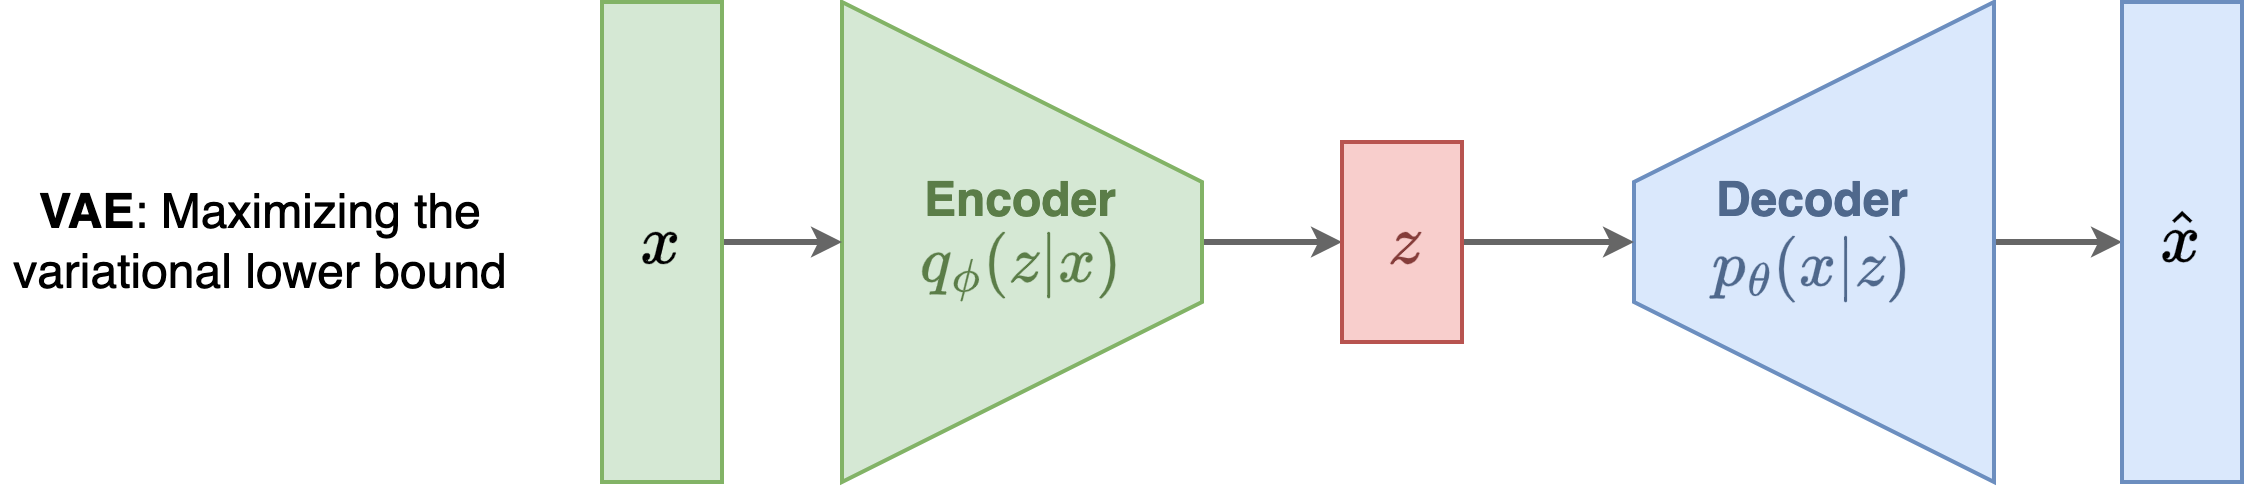

For a datapoint $x$ the training objective is the ELBO
$$
\mathrm{ELBO}_{\theta,\phi}(x)
= \mathbb{E}_{z\sim q_\phi(z\mid x)}\big[\log p_\theta(x\mid z)\big]
- \mathrm{KL}\big(q_\phi(z\mid x)\,\|\,p(z)\big).
$$

- The first term is a **reconstruction** term (how well samples from $q_\phi$ reconstruct $x$ under $p_\theta$).  
- The second term is a **regularizer** that keeps $q_\phi$ close to the prior $p(z)$ (controls information in $z$ and enables sampling).

Typical, simple choices:
- Prior: $p(z)=N(0,I)$.  
- Variational family: $q_\phi(z\mid x)=N\big(\mu_\phi(x),\operatorname{diag}(\sigma^2_\phi(x))\big)$, where $\mu_\phi,\sigma_\phi$ are outputs of the encoder network.  
- Decoder likelihood: chosen to match data type (Bernoulli for binary images, Gaussian for real-valued data, categorical models for discrete tokens).

**Remark: we take the ELBO as given**

We admit the following identity for the ELBO:

$$
\mathrm{ELBO}_{\theta,\phi}(x)
= \log p_\theta(x) - \mathrm{KL}\!\big(q_\phi(z\mid x)\,\|\,p_\theta(z\mid x)\big).
$$

If you want the full derivation, consult the reference (e.g. https://chrisorm.github.io/VI-ELBO.html).  
If anything in that proof is unclear, feel free to ask for help

##### 👩‍💻 Code Example

Don't worry if this section is tricky to follow - here we want to build a better intuition of how a VAE works through using visuals and provide an introduction to the code involved.

To begin, let us download the data.

In [ ]:
# ------------------------------
# 1. Data
# ------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),     # [-1,1] for visuals; BCE expects [0,1], so rescale later
])

train_loader = DataLoader(
    datasets.MNIST("data", train=True, download=True, transform=transform),
    batch_size=128,
    shuffle=True,
)
test_loader = DataLoader(
    datasets.MNIST("data", train=False, download=True, transform=transform),
    batch_size=64,
    shuffle=False,
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.36MB/s]


We can define an example VAE model.

In [ ]:
# ------------------------------
# 2. VAE model
# ------------------------------
class VAE(nn.Module):
    def __init__(self, z_dim=20): # z_dim is the dimension of the latent space
        super().__init__()
        self.encoder = nn.Sequential(   # MNIST data is 28x28
            nn.Flatten(),           # 28×28 → 784
            nn.Linear(28*28, 400),  # 784 → 400
            nn.ReLU(True),
        )
        self.fc_mu     = nn.Linear(400, z_dim)      # 400 → 20 (mean, μ, of latent distribution)
        self.fc_logvar = nn.Linear(400, z_dim)      # 400 → 20 (log variance, log σ², of latent distribution)

        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 400),    # 20 → 400
            nn.ReLU(True),
            nn.Linear(400, 28*28),    # 400 → 784
            nn.Sigmoid(),             # Ensures output ∈ [0,1]
        )

    def encode(self, x):
        h = self.encoder(x)  # Pass input through encoder network to get hidden representation
        return self.fc_mu(h), self.fc_logvar(h)  # Output mean and log variance of latent distribution

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # σ = exp(0.5 * log σ²) = √σ²
        eps = torch.randn_like(std)    # Sample ε ~ N(0,1)
        return mu + eps * std          # z = μ + ε * σ

    def decode(self, z):
        return self.decoder(z).view(-1, 1, 28, 28) # Reconstruct the image

    def forward(self, x):
        mu, logvar = self.encode(x)        # Get distribution parameters
        z = self.reparameterize(mu, logvar) # Sample from the distribution
        x_hat = self.decode(z)             # Reconstruct the image
        return x_hat, mu, logvar           # Return reconstruction (x_hat) and distribution params (mu - μ, logvar - log σ²)

In [ ]:
def loss_function(x_hat, x, mu, logvar, beta=1):
    # BCE expects inputs in [0,1]; our x is in [-1,1], so rescale
    x = (x + 1) / 2

    # Binary Cross Entropy
    # Measures how well the decoder reconstructs the original input by computing pixel-wise differences between reconstructed `x_hat` and original `x`.
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')

    # KL divergence
    # Calculated between learned latent distribution `q(z|x) = N(μ, σ²)` and prior `p(z) = N(0, I)`.
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # The function returns `(total_loss, BCE, KLD)` for monitoring both components during training.
    return BCE + beta * KLD, BCE, KLD

We are now able to initialise our model and run model training.

In [ ]:
# ------------------------------
# 3. Training setup
# ------------------------------
z_dim=20
beta=1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # this controls the device that the model will run on
vae = VAE(z_dim=z_dim).to(device)
optimiser = optim.Adam(vae.parameters(), lr=1e-3) # this controls the learning rate of the model

epochs = 2 # this controls the number of times the model will see the entire dataset
losses, recon_losses, kl_losses = [], [], []

In [ ]:
# ------------------------------
# 4. Training loop
# ------------------------------
for epoch in range(1, epochs+1):
    vae.train()
    train_loss = 0
    for x, _ in train_loader:
        x = x.to(device)

        x_hat, mu, logvar = vae(x) # Pass input through VAE to get reconstruction, mean, and log variance of latent distribution

        loss, rec, kl = loss_function(x_hat, x, mu, logvar, beta) # Calculate loss, reconstruction loss, and KL divergence

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        train_loss += loss.item()

    avg = train_loss / len(train_loader.dataset)
    losses.append(avg)
    recon_losses.append(rec.item() / x.size(0))
    kl_losses.append(kl.item() / x.size(0))
    print(f'Epoch {epoch}/{epochs} | Loss: {avg:.2f}')

Epoch 1/2 | Loss: 158.32
Epoch 2/2 | Loss: 122.75


Finally, we can visualise our outputs 🎨

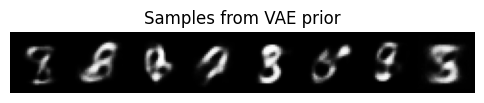

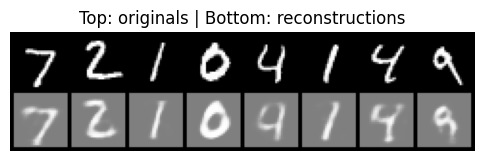

In [ ]:
# ------------------------------
# 5. Visualisations
# ------------------------------
vae.eval()
with torch.no_grad():
    # 5a. Prior samples
    z = torch.randn(8, z_dim, device=device) # Sample 8 random latent vectors from a standard normal distribution (our prior distribution)
    samples = vae.decode(z).cpu() # Decode the latent vectors to get the corresponding images

    # 5b. Reconstructions
    test_imgs, _ = next(iter(test_loader))
    test_imgs = test_imgs.to(device)[:8]
    recon, _, _ = vae(test_imgs) # Pass input through VAE to get reconstruction, mean, and log variance of latent distribution. We only want the reconstruction for the next visualisation steps.
    recon = recon.cpu()

# ---- Plot prior samples ----
grid = make_grid(samples, nrow=8, padding=2, normalize=True)
plt.figure(figsize=(6, 6))
plt.title("Samples from VAE prior")
plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()

# ---- Plot reconstructions ----
comparison = torch.cat([test_imgs.cpu(), recon])
grid = make_grid(comparison, nrow=8, padding=2, normalize=True)
plt.figure(figsize=(6, 4))
plt.title("Top: originals | Bottom: reconstructions")
plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()

Are the samples from the VAE prior clear? Why might they not be clear?

📌 **Play around with these parameters:**

- **Latent size (`z_dim`, default = 20)**  
   • smaller → less detail, blurrier images  
   • bigger  → sharper images **but** risk over-fitting  
   Start with 10–40.

-  **Network size (layers / hidden units)**  
   Bigger networks learn finer details, but train slower.

- **`β` weight on KL term**  
   • lower (<1)  → nicer reconstructions, weaker latent space  
   • higher (>1) → smoother latent space, blurrier images  
   Leave at 1 first, then experiment.

- **Training time (epochs)**  
   More epochs usually help until the model starts over-fitting (loss stops improving).

Keep it simple: tweak one thing at a time, re-run, and watch how the pictures and curves change. Happy experimenting!

### 🤖 Implicit Models

#### Generative Adversarial Networks (GANs)

##### 🕵️ Intuition

 For GANs we are only interested in the **generative** part, not in obtaining a posterior/representation. The model is *implicit*: we do **not** posit a tractable density $p_\theta(x)\$ instead the generator produces samples by transforming a simple prior.

A GAN’s generator $G(z)$ takes a random input $z$ (usually $z \sim N(0,I)$ or Uniform[0,1]) and maps it to a synthetic data sample $G(z)$. The discriminator $D(x)$ outputs a probability (or logit) that $x$ is real (from the training data) versus fake (from $G$). Training is a two-player minimax game: $D$ is trained to better discriminate real vs fake, while $G$ is simultaneously trained to fool $D$. At equilibrium, if the generator succeeds, the generated samples are distributed like the real data, and the discriminator is no better than random guessing (output $0.5$ for real/fake).

##### 🧮 Mathematical Principle

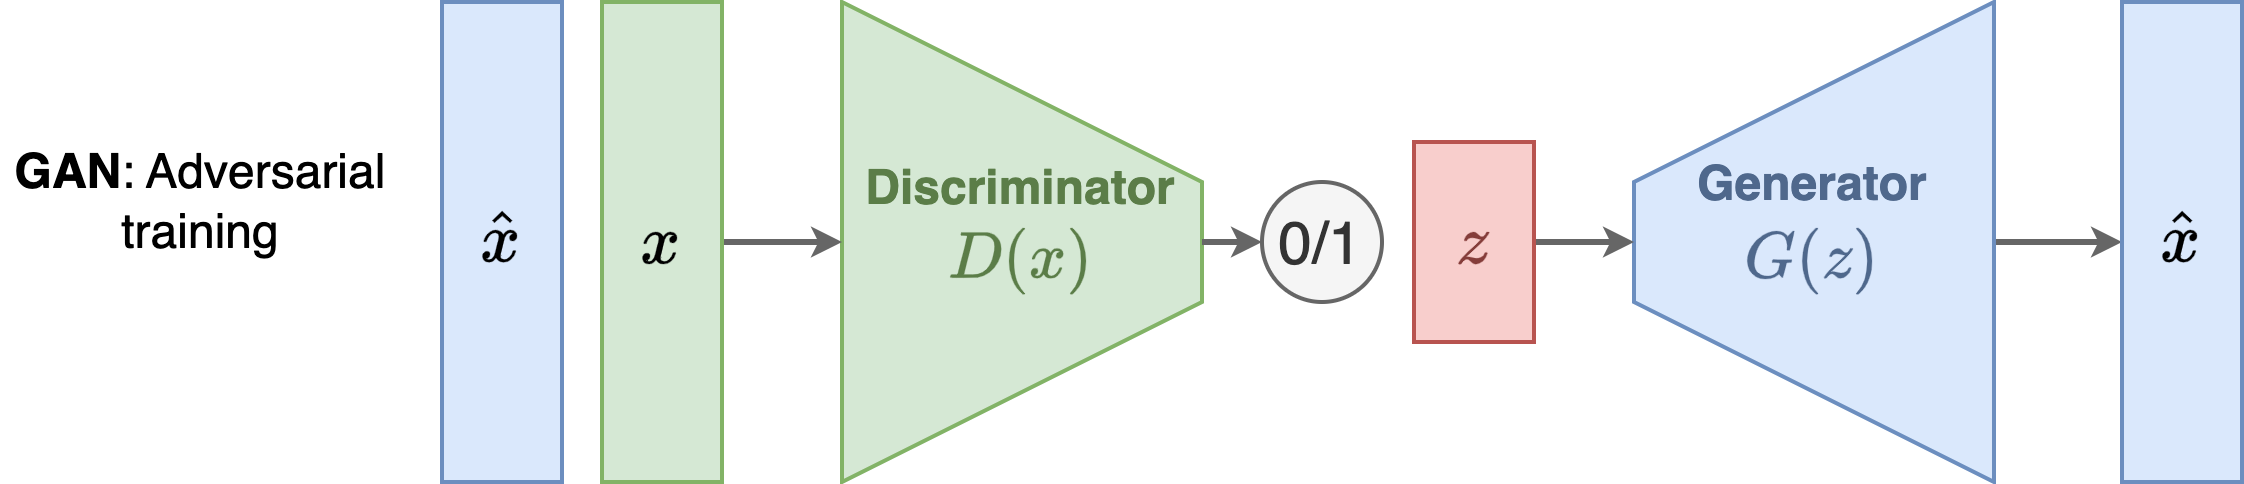

The original GAN paper [(Goodfellow et al. 2014)](https://arxiv.org/abs/1406.2661) used the minimax objective:

$$
\min_{G}\;\max_{D}\;V(D,G)
= \mathbb{E}_{x \sim p_{\mathrm{data}}(x)}\bigl[\log D(x)\bigr]
\;+\;
\mathbb{E}_{z \sim p(z)}\bigl[\log\bigl(1 - D(G(z))\bigr)\bigr].
$$


This value function $V(D,G)$ encapsulates the two competing goals:
*  The discriminator $D$ tries to maximize this objective: it gets higher reward when it confidently classifies real data $x$ as real ($D(x) \approx 1 \implies \log D(x)$ large) and fake samples $G(z)$ as fake ($D(G(z)) \approx 0 \implies \log(1-D(G(z)))$ large).
*  The generator $G$ tries to minimize this objective: it can only affect the second term, and it benefits when $D(G(z))$ is pushed closer to 1 (so that $\log(1-D(G(z)))$ is low). In practice, one often uses the non-saturating variant of the loss for $G$, maximizing $\mathbb{E}_z [\log D(G(z))]$, for better gradients.

GAN training typically alternates gradient descent on $D$ and $G$. If $D$ is too strong, $G$ gets no signal; if $G$ becomes too good, $D$ might be fooled completely. Achieving stability is tricky. When successful, GANs can produce very sharp and realistic samples (especially in image generation). However, because GANs do not explicitly model $p(x)$, it's hard to evaluate their performance by likelihood; instead metrics like Inception Score or FID are used. GANs may also suffer from mode collapse (producing limited diversity).

##### 👩‍💻 Code Example

As before, we start with downloading our datasets and creating our dataloaders. We will make use of the MNIST dataset again.

In [ ]:
# ------------------------------
# 1. Dataset & loader
# ------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),     # scale to [-1, 1]
    transforms.Lambda(lambda x: x.view(-1)),   # flatten 1×28×28 → 784
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root="data", train=True, download=True, transform=transform),
    batch_size=128,
    shuffle=True,
)

We can define a generator and discriminator for our GAN architecture.

In [ ]:
# ------------------------------
# 2. Model definitions
# ------------------------------
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_dim=784):
        # z_dim: dimension of the input noise vector for the generator
        # img_dim: dimension of the flattened image (e.g., 28x28=784 for MNIST)
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, img_dim),
            nn.Tanh(),       # output range [-1, 1]
        )

    def forward(self, z):
        return self.net(z)


class Discriminator(nn.Module):
    def __init__(self, img_dim=784):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(img_dim, 256),
            nn.LeakyReLU(0.2, True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, True),
            nn.Linear(128, 1),
        )

    def forward(self, x):
        return self.net(x)

The following cell contains our hyperparameters. We can change these values and see how it effects the model training.

In [ ]:
# ------------------------------
# 3. Training hyper-params
# ------------------------------
device      = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_dim       = 10 # z_dim: dimension of the input noise vector for the generator (controls the randomness and diversity of generated images)
epochs      = 2
lr          = 2e-4
beta1, beta2 = 0.5, 0.999

# Instantiate the Generator and Discriminator models.
gen  = Generator(z_dim).to(device)
disc = Discriminator().to(device)

# Set up Adam optimizers for both Generator and Discriminator.
# lr: learning rate for the optimizer (controls how much to update the model parameters at each step)
# betas: coefficients used for computing running averages of gradient and its square (affect the stability and speed of convergence)
opt_g = optim.Adam(gen.parameters(),  lr=lr, betas=(beta1, beta2))
opt_d = optim.Adam(disc.parameters(), lr=lr, betas=(beta1, beta2))

# Loss function: Binary Cross Entropy with logits. We use logits since the discriminator outputs 0 (Fake) or 1 (Real).
# Used to measure how well the discriminator distinguishes real from fake images.
criterion = nn.BCEWithLogitsLoss()

# fixed_noise: a fixed batch of random noise vectors, used to generate consistent samples from the generator during training.
fixed_noise = torch.randn(64, z_dim, device=device)  # for consistent samples

# Lists to store generator and discriminator losses for each epoch (for plotting/monitoring training progress).
g_losses, d_losses = [], []

We can now train our model. We can think of training a GAN as a minimax game between the Generator (G) and Discriminator (D). The goal of the game is for G to learn to fool D, while D learns to detect fake images 🎮

In [ ]:
# ------------------------------
# 4. Training loop
# ------------------------------
for epoch in range(1, epochs + 1):
    g_epoch, d_epoch, n_batches = 0.0, 0.0, 0
    for real, _ in train_loader:  # _ ignores labels since we don't need them
        real = real.to(device)
        batch_size = real.size(0)

        # ============================================
        # 🛡️ PHASE 1: Train Discriminator (Critic)
        # ============================================
        # Goal: Teach D to distinguish real vs fake images

        # Generate fake images from random noise
        noise = torch.randn(batch_size, z_dim, device=device)  # Sample from standard normal distribution, N(0,1)
        fake = gen(noise).detach()  # .detach() prevents G gradients from flowing

        # Get discriminator predictions (probability of being "real")
        disc_real = disc(real).squeeze()  # D's confidence that real images are real
        disc_fake = disc(fake).squeeze()  # D's confidence that fake images are real

        # Compute discriminator loss: maximize log(D(real)) + log(1-D(fake))
        loss_d = criterion(disc_real, torch.ones_like(disc_real))   # Real → should output 1
        loss_d += criterion(disc_fake, torch.zeros_like(disc_fake)) # Fake → should output 0

        # Update discriminator parameters
        opt_d.zero_grad()
        loss_d.backward()
        opt_d.step()

        # ============================================
        # 🎨 PHASE 2: Train Generator (Artist)
        # ============================================
        # Goal: Teach G to create images that fool the discriminator

        # Generate NEW fake images (fresh noise, no .detach()!)
        noise = torch.randn(batch_size, z_dim, device=device)
        fake = gen(noise)        # 🔥 KEY: No .detach() so G gradients can flow!
        output = disc(fake).squeeze()  # D's assessment of G's fake images

        # Generator loss: maximize log(D(G(z))) = minimize -log(D(G(z)))
        loss_g = criterion(output, torch.ones_like(output))  # G wants D to think fakes are real!

        # Update generator parameters
        opt_g.zero_grad()  # Clear previous gradients
        loss_g.backward()  # Compute gradients (flows through both G and D!)
        opt_g.step()       # Update G's weights

        # Stats
        g_epoch += loss_g.item()
        d_epoch += loss_d.item()
        n_batches += 1

    g_losses.append(g_epoch / n_batches)
    d_losses.append(d_epoch / n_batches)
    print(f'Epoch {epoch}/{epochs} | G_loss: {g_losses[-1]:.4f} | D_loss: {d_losses[-1]:.4f}')

Epoch 1/2 | G_loss: 1.0570 | D_loss: 1.0164
Epoch 2/2 | G_loss: 1.9134 | D_loss: 0.6731


💡 Interpretation:
- G_loss ↓: Generator getting better at fooling discriminator
- D_loss ↓: Discriminator getting better at detection  
- Ideally both converge to ~0.693 (-log(0.5)) when perfectly balanced as this implies the discriminator cannot tell between real and fake images and is randomly guessing. This value comes from the Binary Cross Entropy loss function. Try to derive why ~0.693 is ideal 🧮

Let us now plot our generated MNIST-like digits 🎨

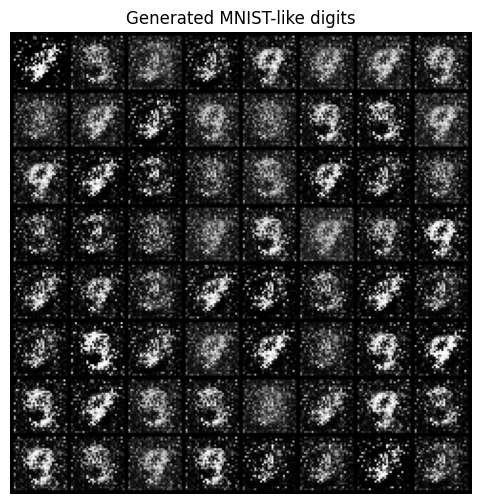

In [ ]:
# ------------------------------
# 5. Visualisations
# ------------------------------
gen.eval()
with torch.no_grad():
    fake_samples = gen(fixed_noise).cpu().view(-1, 1, 28, 28)

# Sample grid
grid = make_grid(fake_samples, nrow=8, normalize=True, value_range=(-1, 1))

plt.figure(figsize=(6, 6))
plt.title("Generated MNIST-like digits")
plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.show()

We can see that some of these outputs look like numbers, however much improvement can be made! Feel free to play around with the different model components, and hyperparameters and see if you can improve the results 🤖

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/8ya2yWVVwgyupVhD9",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />